In [23]:
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('matrixdata.csv',
                    index_col = 0)

# Make a copy of the data frame
df_tr = df

# Standardize data with Z-score
clmns = ['action', 'strategy','rpg', 'indie', 'adventure', 'sports', 'simulation', 'mmo', 'free', 'casual']
df_tr_std = stats.zscore(df_tr[clmns])

# Cluster the data
kmeans = KMeans(n_clusters=6, random_state=0).fit(df_tr_std)
labels = kmeans.labels_

# Insert respective clusters to the original data
df_tr['clusters'] = labels

# Add the cluster column
clmns.extend(['clusters'])

# Cluster analysis
print (df_tr[clmns].groupby(['clusters']).mean())

# Write dataframe to file
df_tr.to_csv('out.csv')

               action     strategy          rpg        indie    adventure  \
clusters                                                                    
0           12.793079     1.783974     1.882981     2.235751     2.298629   
1          355.160932   155.108471   137.488505   308.616109   214.044900   
2          497.860000   232.440000   216.530000   598.580000   327.810000   
3         3177.255814  1362.837209  1082.372093  4412.488372  2463.651163   
4         1093.503464   467.004619   398.290993  1270.159353   796.660508   
5          122.639647    45.384659    42.898221    69.564068    58.282361   

              sports  simulation         mmo        free       casual  
clusters                                                               
0           0.192465    0.997161    0.407117    0.594787     0.501447  
1          14.382811   82.482950   12.710076   23.577689    87.369696  
2          37.780000  141.700000  134.150000  425.270000   275.840000  
3         209.720930  9

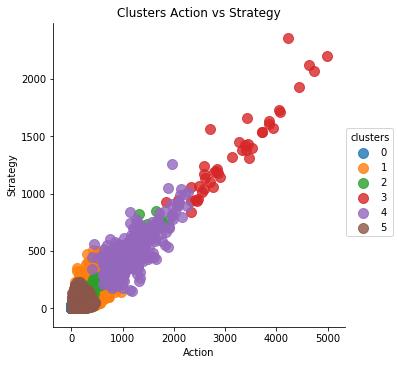

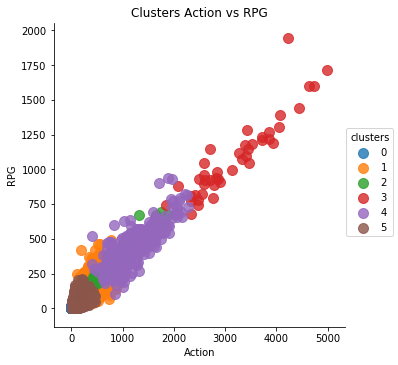

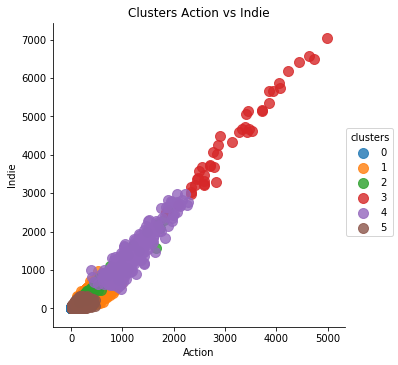

In [25]:
# Just plotting some stuff out
sns.lmplot('action', 'strategy', 
           data=df_tr, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Clusters Action vs Strategy')
plt.xlabel('Action')
plt.ylabel('Strategy')

plt.show()

sns.lmplot('action', 'rpg', 
           data=df_tr, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Clusters Action vs RPG')
plt.xlabel('Action')
plt.ylabel('RPG')

plt.show()

sns.lmplot('action', 'indie', 
           data=df_tr, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Clusters Action vs Indie')
plt.xlabel('Action')
plt.ylabel('Indie')

plt.show()